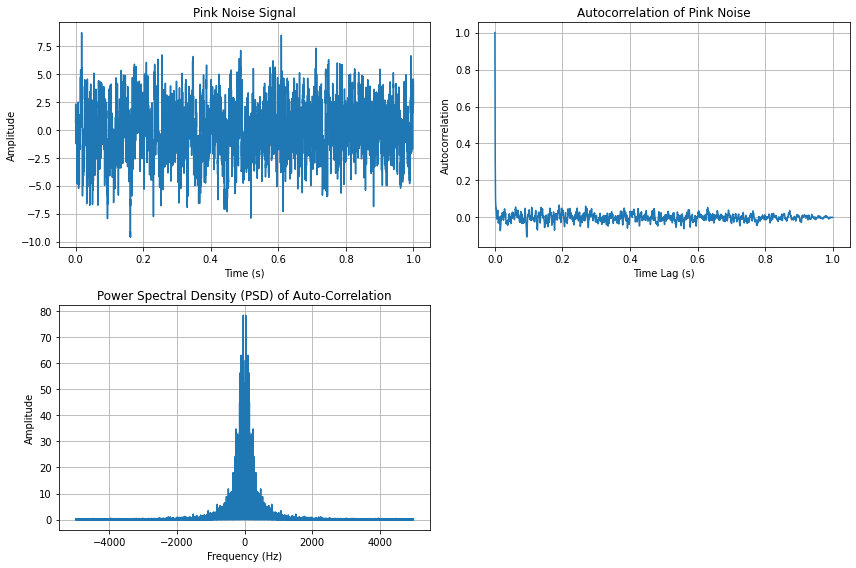

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters for the pink noise signal
sampling_rate = 10000  # Number of samples per second
total_time = 1.0      # Total time duration in seconds
num_samples = int(total_time * sampling_rate)

# Generate pink noise signal with mean 0 and standard deviation 1
pink_noise = np.random.normal(loc=0, scale=1, size=num_samples)
pink_noise = signal.lfilter([1], [1, -0.9], pink_noise)

# Compute the autocorrelation using NumPy's correlate function
autocorrelation = np.correlate(pink_noise, pink_noise, mode='full')

# Normalize the autocorrelation function
autocorrelation /= np.max(autocorrelation)

# Compute the time lag axis for plotting
time_lags = np.linspace(-total_time, total_time, num=len(autocorrelation))

# Compute the Fourier transform (Power Spectral Density) of the autocorrelation
psd = np.fft.fft(autocorrelation)

# Compute the frequency axis for plotting the PSD
frequency = np.fft.fftfreq(len(autocorrelation), d=1.0 / sampling_rate)

# Plot the pink noise signal, its autocorrelation, and the power spectral density (PSD)
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(np.arange(num_samples) / sampling_rate, pink_noise)
plt.title("Pink Noise Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(222)
half_index = len(autocorrelation) // 2
plt.plot(time_lags[half_index:], autocorrelation[half_index:])
plt.title("Autocorrelation of Pink Noise")
plt.xlabel("Time Lag (s)")
plt.ylabel("Autocorrelation")
plt.grid(True)

plt.subplot(223)
plt.plot(frequency, np.abs(psd))
plt.title("Power Spectral Density (PSD) of Auto-Correlation")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()
#lorentzian linewidth